In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
landslides = pd.read_csv("landslide_catalog.csv")

In [8]:
landslides = landslides[['latitude', 'longitude', 'country']]
print(len(landslides))
landslides.head()

6788


,latitude,longitude,country
0,41.5585,-73.4020,United States
1,0.1115,113.9171,Indonesia
2,52.3545,-127.6980,NaN
3,50.7053,-127.5062,Canada
4,53.3319,-132.4149,NaN


In [9]:
landslides.country.value_counts()

United States     1448
India              893
Philippines        555
China              352
Nepal              321
                  ... 
Jordan               1
UnitedÂ States       1
Ethiopia             1
Vanuatu              1
Zambia               1
Name: country, Length: 139, dtype: int64

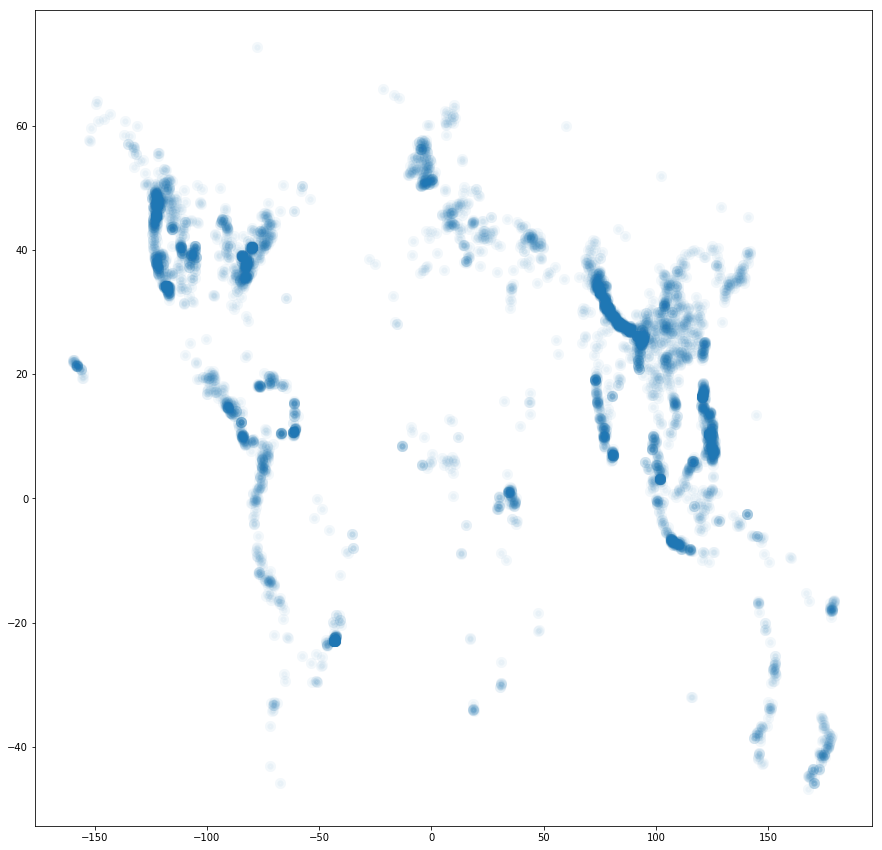

In [17]:
plt.figure(figsize=(15, 15))
plt.scatter(x=landslides["longitude"], y = landslides['latitude'], alpha=0.05, linewidths=5)
plt.show()